<a href="https://colab.research.google.com/github/Elwing-Chou/ximen0703/blob/main/mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

tensorflow 2 = tensorflow + keras

!!!! import keras -> import tensorflow.keras

In [1]:
from tensorflow.keras.datasets.mnist import load_data
# ((x_train, y_train), (x_test, y_test))
(x_train, y_train), (x_test, y_test) = load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [2]:
import pandas as pd
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0


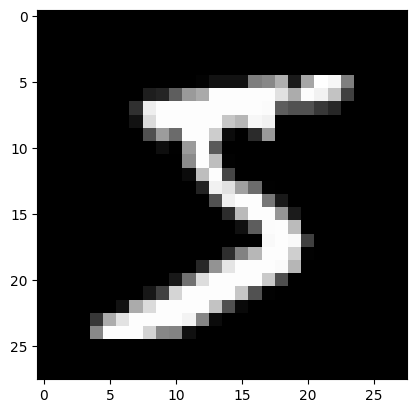

In [3]:
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
# cmap reverse: _r
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap="gray")

In [4]:
# 地基: Model(Sequential/Model)
# 樓層: Layer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
layers = [
    # 100480 = 784 * 128 + 128(bias)
    Dense(128, activation="relu", input_dim=784),
    # 1290 = 128 * 10 + 10(bias)
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [5]:
# (X)輸出只有一個神經元: binary cross entropy
# q1: p1log(1/q1) + (1-p1)log(1/1-q1)
# n個神經元: categorical cross entropy
# p1log1/q1 + p2log1/q2 + ...
from tensorflow.keras.losses import CategoricalCrossentropy
model.compile(loss=CategoricalCrossentropy(),
       metrics=["accuracy"])

In [6]:
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)
print(y_train[0])
print(y_train_cat[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [7]:
# X: scaling, 隨機係數是有在跟你的輸入作配合的
# 0~1 / -1~1
x_train_norm = x_train.reshape(-1, 784) / 255.0
x_test_norm = x_test.reshape(-1, 784) / 255.0
print(x_train.shape)
print(x_train_norm.shape)

(60000, 28, 28)
(60000, 784)


In [8]:
# demo
import numpy as np
n = np.array([
    [1, 2, 3],
    [4, 5, 6]
])
# -1: 自動推算(2)
n.reshape(3, -1)

array([[1, 2],
       [3, 4],
       [5, 6]])

In [9]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
c = [
    ModelCheckpoint("mlp.h5", save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True)
]
# batch_size = 20(圖片大或資料少)~200(圖片小或資料多)
# 54000 / 200 = 270(梯度下降)
# 沒做任何事: 差不多100個epch訓練完畢
# relu: 35epoch
# ce: 15epoch
model.fit(x_train_norm,
     y_train_cat,
     batch_size=200,
     epochs=100,
     validation_split=0.1,
     callbacks=c)

Epoch 1/100
270/270 [==============================] - 6s 5ms/step - loss: 0.4080 - accuracy: 0.8900 - val_loss: 0.1878 - val_accuracy: 0.9485
Epoch 2/100
270/270 [==============================] - 1s 3ms/step - loss: 0.2030 - accuracy: 0.9417 - val_loss: 0.1391 - val_accuracy: 0.9640
Epoch 3/100
270/270 [==============================] - 1s 3ms/step - loss: 0.1481 - accuracy: 0.9577 - val_loss: 0.1145 - val_accuracy: 0.9695
Epoch 4/100
270/270 [==============================] - 1s 3ms/step - loss: 0.1153 - accuracy: 0.9674 - val_loss: 0.0999 - val_accuracy: 0.9730
Epoch 5/100
270/270 [==============================] - 1s 3ms/step - loss: 0.0934 - accuracy: 0.9730 - val_loss: 0.0886 - val_accuracy: 0.9753
Epoch 6/100
270/270 [==============================] - 1s 3ms/step - loss: 0.0791 - accuracy: 0.9772 - val_loss: 0.0848 - val_accuracy: 0.9763
Epoch 7/100
270/270 [==============================] - 1s 3ms/step - loss: 0.0667 - accuracy: 0.9806 - val_loss: 0.0809 - val_accuracy: 0.9760

In [10]:
model.evaluate(x_test_norm, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.0687 - accuracy: 0.9802


[0.06866712123155594, 0.9801999926567078]

In [11]:
pre = model.predict(x_test_norm)
sum(pre[0])

313/313 [==============================] - 1s 1ms/step


0.9999999817953052